<a href="https://colab.research.google.com/github/jtinklerdav/jtinklerdav.github.io/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Colab Worksheet, I have imported a csv I created combining 7 variables describing the wine market in 19 different countries, split into Old World and New World Wines. the variables are: Wine Production, Vineyard Surface Area, Consumption, Import, Export, Average Temperature and Average Rainfall.

In the code below I convert this csv into a form that can be analysed by indexing the country variable and transforming into a standardised X matrix and then creating a standardised y vector for the supervised learning task.

Using sklearn and python I undertake 2 machine learning techniques

In the code below, I first undertake Classification for my supervised learning technique. Then, I create a clustered dendogram, an unsupervised area of machine learning.

# Classification: Supervised Learning

In this code I create a classifier based on the Continent in which a country is from. Therefore using machine learning to predict which countries belong to which Continents and seeing how similar that is to the true observations. From the regression graph at the end of this section and the code we know that the accuracy of predicting a country was 73%

In [220]:
%matplotlib inline
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [287]:
raw1 = pd.read_csv('total_machine.csv')

In [288]:
raw1.columns

Index(['Country', 'Continent_div', 'Continent', 'Production', 'Surface area',
       'Consumption', 'Import', 'Export', 'AvgTemp',
       'Average precipitation (mm in depth per year)'],
      dtype='object')

In [289]:
raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country                                       60 non-null     object 
 1   Continent_div                                 60 non-null     int64  
 2   Continent                                     60 non-null     object 
 3   Production                                    60 non-null     float64
 4   Surface area                                  60 non-null     float64
 5   Consumption                                   60 non-null     float64
 6   Import                                        60 non-null     float64
 7   Export                                        60 non-null     float64
 8   AvgTemp                                       60 non-null     float64
 9   Average precipitation (mm in depth per year)  60 non-null     int64

In [290]:
len(raw1),len(raw1['Country'].unique())

(60, 60)

In [291]:
df=raw1.drop(['Continent'],axis=1).set_index('Country')
df

,Continent_div,Production,Surface area,Consumption,Import,Export,AvgTemp,Average precipitation (mm in depth per year)
Country,,,,,,,,
Algeria,1,1.368268,0.001683,1.014799,0.154478,0.010718,22.50,89
Egypt,1,0.052768,0.000762,0.055700,0.000010,0.000156,22.10,18
Ethiopia,1,0.689558,0.002233,0.689558,1.829914,0.205143,22.20,848
Madagascar,1,0.281680,0.000100,0.328626,0.081976,0.001300,22.65,1513
Morocco,1,1.284185,0.001234,1.568657,0.734695,0.325733,17.10,346
South Africa,1,16.363538,0.002179,6.584195,0.881136,11.178412,17.75,495
Tunisia,1,3.130654,0.001927,2.665286,0.153148,0.253752,19.20,207
Zimbabwe,1,0.094194,0.000030,0.228757,0.028056,0.000875,21.00,657
Armenia,2,3.948389,0.005402,3.003475,0.509241,3.999347,7.15,562


In [292]:
X = df[[i for i in df.columns if i!='Continent_div']].fillna(0)
y = df[[i for i in df.columns if i=='Continent_div']]['Continent_div'].values

In [293]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [294]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
clf = RandomForestClassifier(n_estimators=150, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [295]:
metrics.accuracy_score(ypred, ytest)

0.7333333333333333

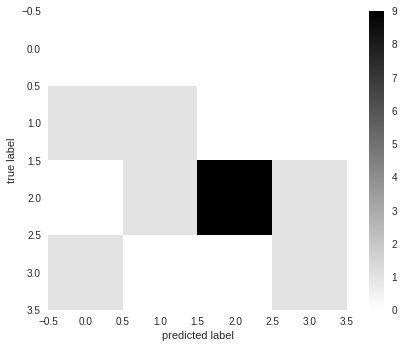

In [296]:
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

In [297]:
raw1.set_index('Continent_div')['Continent'].drop_duplicates()

Continent_div
1     Africa
2       Asia
3     Europe
4    America
Name: Continent, dtype: object

In [298]:
labels=raw1.set_index('Continent_div')['Continent'].drop_duplicates().values

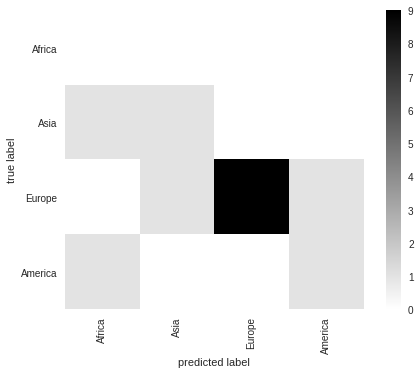

In [299]:
# plt.figure(figsize=(10,6))
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");
plt.gca().set_yticks(range(len(labels)));
plt.gca().set_xticks(range(len(labels)));
plt.gca().set_yticklabels(labels);
plt.gca().set_xticklabels(labels,rotation=90);
plt.show()

# Creating Standardised X matrix and transforming y data into a y vector 
For Unsupervised Learning

In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

Having imported the tools needed to undertake the machine learning techinques I import my dataset below

In [206]:
raw = pd.read_csv('old_vs_new_machine.csv')

In [137]:
raw.columns

Index(['Country', 'Continent_div', 'Continent', 'Production', 'Surface area',
       'Consumption', 'Import', 'Export', 'AvgTemp',
       'Average precipitation (mm in depth per year)'],
      dtype='object')

In [138]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country                                       19 non-null     object 
 1   Continent_div                                 19 non-null     int64  
 2   Continent                                     19 non-null     object 
 3   Production                                    19 non-null     float64
 4   Surface area                                  19 non-null     float64
 5   Consumption                                   19 non-null     float64
 6   Import                                        19 non-null     float64
 7   Export                                        19 non-null     float64
 8   AvgTemp                                       19 non-null     float64
 9   Average precipitation (mm in depth per year)  19 non-null     int64

In [207]:
len(raw),len(raw['Country'].unique())

(19, 19)

Having printed the info on the 'raw' dataframe I have set the Country to be the index and now convert it into a standardised X matrix and y vector

In [208]:
df=raw.drop(['Continent'],axis=1).set_index('Country')
df

,Continent_div,Production,Surface area,Consumption,Import,Export,AvgTemp,Average precipitation (mm in depth per year)
Country,,,,,,,,
Argentina,1,28.690896,0.004742,18.802575,0.100536,17.464005,14.80,591
Australia,1,46.588081,0.005692,22.585684,22.747866,81.142386,21.65,534
Austria,2,27.644248,0.005438,25.300375,29.888983,24.355872,6.35,1110
Canada,1,1.832416,0.000336,12.356324,51.245985,1.706829,-5.10,537
Chile,1,62.454852,0.010986,9.416093,0.964469,100.959191,8.45,1522
Croatia,2,17.392679,0.005265,25.174915,8.846302,4.399804,10.90,1113
France,2,62.619557,0.011789,36.678590,14.734377,162.820243,10.70,867
Georgia,2,47.277310,0.013283,29.306560,0.675851,59.665309,5.65,1026
Germany,2,9.882051,0.001240,23.809274,35.532937,14.049264,8.40,700


In [209]:
X = df[[i for i in df.columns if i!='Continent_div']].fillna(0)
y = df[[i for i in df.columns if i=='Continent_div']]['Continent_div'].values

Having set up my new matrix I now import the sklearn tools to conduct my machine learning task

In [107]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [210]:
raw.set_index('Continent_div')['Continent'].drop_duplicates()

Continent_div
1    New World
2    Old World
Name: Continent, dtype: object

In [211]:
labels=raw.set_index('Continent_div')['Continent'].drop_duplicates().values

# Clustering: Unsupervised Machine learning


In [212]:
import scipy.cluster.hierarchy as sch

This is a dendogram showing the relationship between by 7 explanatory variables, unsurprisingly import and consumption have the closest relationship

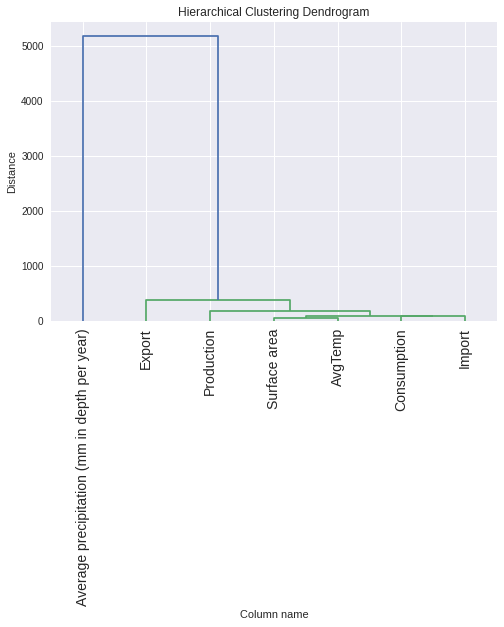

In [213]:
Z = sch.linkage(X.T, method='ward', metric='euclidean')

# Plot dendogram
# plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Column name')
plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
    labels=X.columns
)
plt.show()

Having done this, I now want to see the relationships between the different countries. To do this I must create a new X matrix setting the Countries as the index so that the difference between them is seen

In [214]:
X2=raw.set_index('Country').drop(['Continent_div','Continent'],axis=1).fillna(0)
X2

,Production,Surface area,Consumption,Import,Export,AvgTemp,Average precipitation (mm in depth per year)
Country,,,,,,,
Argentina,28.690896,0.004742,18.802575,0.100536,17.464005,14.80,591
Australia,46.588081,0.005692,22.585684,22.747866,81.142386,21.65,534
Austria,27.644248,0.005438,25.300375,29.888983,24.355872,6.35,1110
Canada,1.832416,0.000336,12.356324,51.245985,1.706829,-5.10,537
Chile,62.454852,0.010986,9.416093,0.964469,100.959191,8.45,1522
Croatia,17.392679,0.005265,25.174915,8.846302,4.399804,10.90,1113
France,62.619557,0.011789,36.678590,14.734377,162.820243,10.70,867
Georgia,47.277310,0.013283,29.306560,0.675851,59.665309,5.65,1026
Germany,9.882051,0.001240,23.809274,35.532937,14.049264,8.40,700


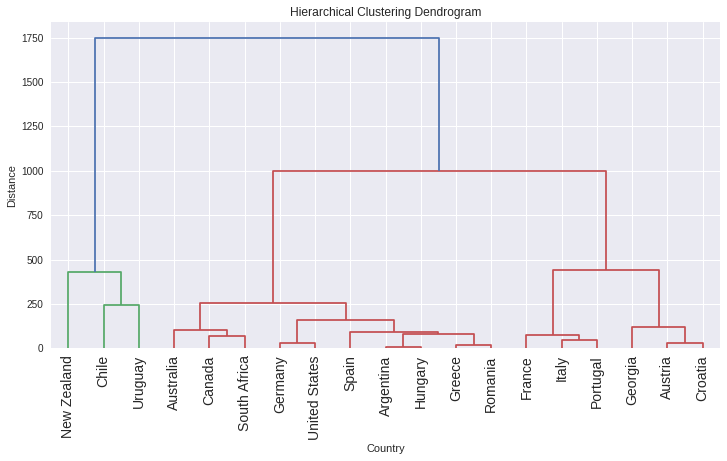

In [302]:
Z = sch.linkage(X2, method='ward', metric='euclidean')

# Plot dendogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
    labels=X2.index
)
plt.show()

# Dimensionality Reduction: Unsupervised Machine Learning

In [170]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = neighbors.KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

K nearest neighbors (kNN) is a simple learning strategy: given a new, unknown observation, look up in the reference database which ones have the closest features and assign the predominant class.


In [171]:
X.shape

(19, 7)

In [172]:
from sklearn.decomposition import PCA #import the PCA model from the decomposition model collection. Same syntax as before, but we don't have a y!
pca = PCA(n_components=2) # Create PCA model. Need to specify number of components. We will use 2, in order to be able to plot them in 2D space. n_components is a hyperparameter of the PCA model 
pca.fit(X)
X_reduced = pca.transform(X) #Dimensionality reduction models have a special function called transform, where you transform the data into the new 2 dimensions from the old 4. This changes the shape of your data!
print("Original dataset shape:",X.shape, "Reduced dataset shape:", X_reduced.shape)

Original dataset shape: (19, 7) Reduced dataset shape: (19, 2)


In [173]:
pd.DataFrame(X)

,Production,Surface area,Consumption,Import,Export,AvgTemp,Average precipitation (mm in depth per year)
Country,,,,,,,
Argentina,28.690896,0.004742,18.802575,0.100536,17.464005,14.80,591
Australia,46.588081,0.005692,22.585684,22.747866,81.142386,21.65,534
Austria,27.644248,0.005438,25.300375,29.888983,24.355872,6.35,1110
Canada,1.832416,0.000336,12.356324,51.245985,1.706829,-5.10,537
Chile,62.454852,0.010986,9.416093,0.964469,100.959191,8.45,1522
Croatia,17.392679,0.005265,25.174915,8.846302,4.399804,10.90,1113
France,62.619557,0.011789,36.678590,14.734377,162.820243,10.70,867
Georgia,47.277310,0.013283,29.306560,0.675851,59.665309,5.65,1026
Germany,9.882051,0.001240,23.809274,35.532937,14.049264,8.40,700


In [174]:
pd.DataFrame(X_reduced)

,0,1
0,-276.759926,-8.037011
1,-326.421037,64.223482
2,239.954347,-55.832548
3,-332.728462,-25.893487
4,658.393930,-18.095052
5,240.641748,-78.405807
6,13.585857,111.556505
7,160.590786,-7.727010
8,-169.186951,-27.944773
9,-217.202664,-24.755249


In [175]:
pd.DataFrame(X_reduced,y)

,0,1
1,-276.759926,-8.037011
1,-326.421037,64.223482
2,239.954347,-55.832548
1,-332.728462,-25.893487
1,658.393930,-18.095052
2,240.641748,-78.405807
2,13.585857,111.556505
2,160.590786,-7.727010
2,-169.186951,-27.944773
2,-217.202664,-24.755249


In [96]:
print(y)

[1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 5 5 6 6 6 6 6 6 6]


In [219]:
pca.components_ 

array([[ 2.24180565e-02,  1.65040855e-06,  4.36833657e-04,
        -1.04521866e-03,  1.04319538e-01, -1.27016763e-03,
         9.94289680e-01],
       [ 3.22943408e-01,  5.27684274e-05,  8.37120109e-02,
         1.64990713e-02,  9.36390200e-01,  2.16098146e-02,
        -1.05517973e-01]])

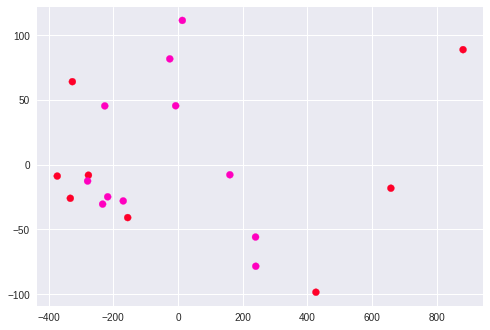

In [218]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='gist_rainbow')